In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [205]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
# read the file
data = pd.read_csv('Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [207]:
# remove column 'RowNumber' , 'CustomerId' and 'Surname' - not relevant for prediction
data.drop(columns=['RowNumber' ,  'CustomerId' , 'Surname'] , axis = 1 , inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [232]:
# check of duplication
data.duplicated().sum()

np.int64(0)

In [208]:
# check for empty / null / values from each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [233]:
data[cat_col].describe()

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [234]:
data[num_col].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


np.int64(0)

Describtion Analysis

In [210]:
data.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


* Customers have a good credit score, as shown the minimum score for credit score is 650. This means all customers are using the credit system.
* Geographically most customers are located at France. Thus the bank should give attention to these clients.
* The minimum age to have a bank account is 18, according to the data. But most of the customers are between the age of 32 to 44.
* Most of the customers are stated using the bank for 3 to 7 years ago. Also there are new customers with zero tenure. The average is 5 year.
* Half of customers are active members in the bank. Which is a warning that indicates half of clients are not active.
* 40 percent of customers churned from the bank.
* There is a high variation between customer's salary. The minimum amount is 11 and maximum 100,090.
* 20 percent in average of customer's are in complain with the bank.
* There is a good satisfaction score from the bank service. It averages is 3 which is good.
* DIAMOND card type is much preferable. It is used by 2507 customers out of the four card types.

### Analysis

#### Categorical Data Analysis

In [211]:
cat_col = data.select_dtypes(include='object').columns

In [212]:
for column in cat_col:
    print(data[column].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


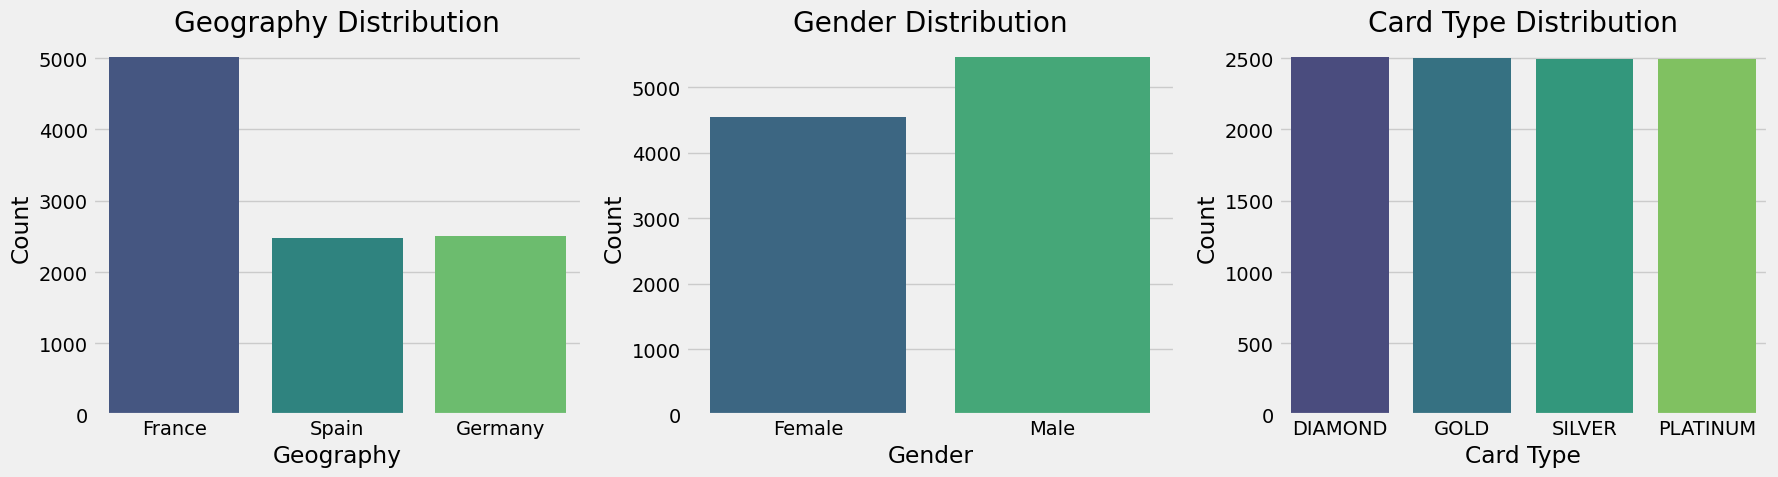

In [213]:
# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for Geography
sns.countplot(ax=axes[0], x='Geography', data=data, palette='viridis')
axes[0].set_title('Geography Distribution')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')

# Plot for Gender
sns.countplot(ax=axes[1], x='Gender', data=data, palette='viridis')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot for Card Type
sns.countplot(ax=axes[2], x='Card Type', data=data, palette='viridis')
axes[2].set_title('Card Type Distribution')
axes[2].set_xlabel('Card Type')
axes[2].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


The scope of the dataset is on France, Germany and Spain coutries. Most of the data is grabbed from Germany which will take a dominance in the data. This is a sign that the bank has more french customers relative to others. The Gender distribution is equally distributed. Customer in these countries uses four types of Card type in their bank.

#### Numerical Analysis

In [214]:
num_col = data.select_dtypes(exclude='object').columns
num_col

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')

Geography analysis

In [215]:
data.groupby('Geography')['Age']

In [216]:
age_geo = data.groupby('Geography')['Age'].mean().round(1).reset_index()
age_geo

,Geography,Age
0,France,38.5
1,Germany,39.8
2,Spain,38.9


### Univariate analysis

- Average Mean in Countries

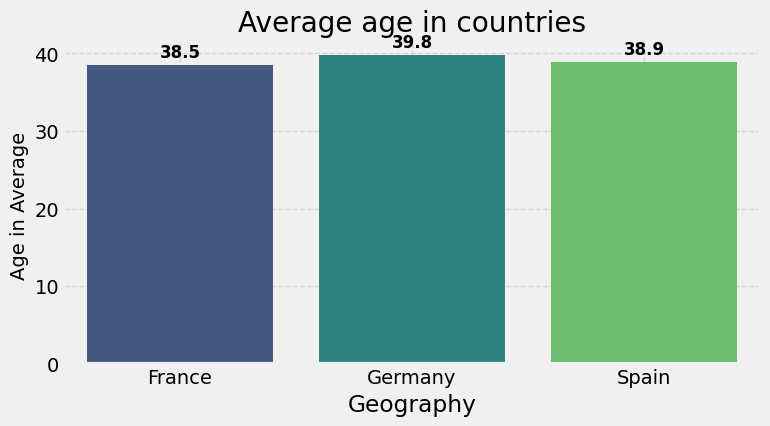

In [217]:
plt.figure(figsize=(8,4))
barplot = sns.barplot(data=age_geo,
            x='Geography',
            y="Age",
            palette='viridis')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points', 
                     fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Average age in countries")
plt.ylabel('Age in Average ', fontsize=14)
plt.show()

Average age is relative same for all countries.

- Number of customers leave the company

In [235]:
customer_leave = data['Exited'].value_counts().reset_index()
customer_leave['Exited'] = customer_leave['Exited'].map({1: 'Leave', 0: 'Stay'})
customer_leave

,Exited,count
0,Stay,7962
1,Leave,2038


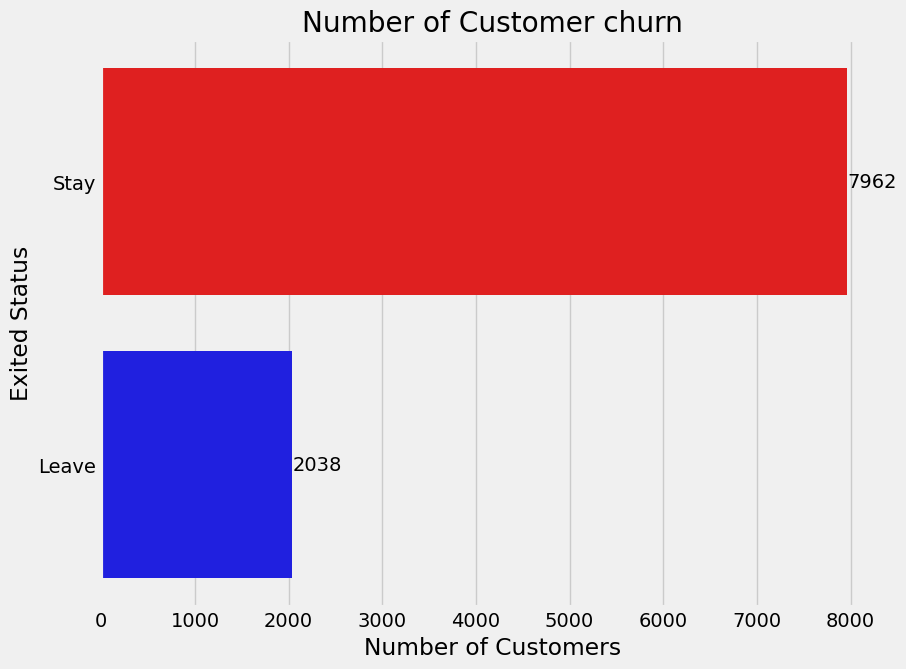

In [239]:
plt.figure(figsize=(9,7))
barplot2 = sns.barplot(data=customer_leave,
            x = "count",
            y = "Exited",
            orient='h',
            palette = ["red", "blue"]
            )
plt.title("Number of Customer churn")
plt.ylabel("Exited Status")
plt.xlabel("Number of Customers")  
for index, value in enumerate(customer_leave['count']):
    plt.text(value, index, str(value), va='center')
plt.savefig("Pictures/Number of Customer churn.jpg")
plt.show()


Most of customers are leaving from the bank.

In [220]:
geo_exit = data.groupby("Geography").sum()["Exited"].reset_index()
geo_exit

,Geography,Exited
0,France,811
1,Germany,814
2,Spain,413


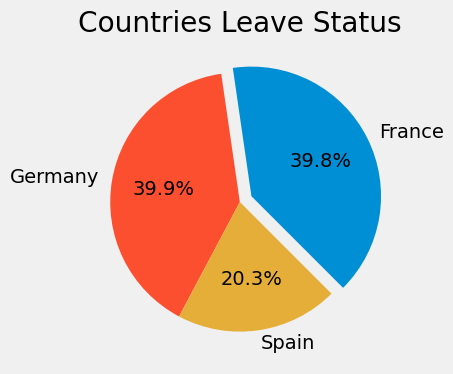

In [221]:
plt.figure(figsize=(8,4))
plt.pie(x = geo_exit["Exited"] , labels=geo_exit["Geography"] , autopct='%1.1f%%' , startangle=-45 , explode=[0.1,0,0])
plt.title("Countries Leave Status")
plt.savefig("Pictures\Countries Leave Status.jpg")
plt.show()

- Credit Score by age

In [222]:
age_credit = data.groupby("Age")["CreditScore"].sum().reset_index()
age_credit.head()

,Age,CreditScore
0,18,15107
1,19,17972
2,20,26602
3,21,34306
4,22,53470


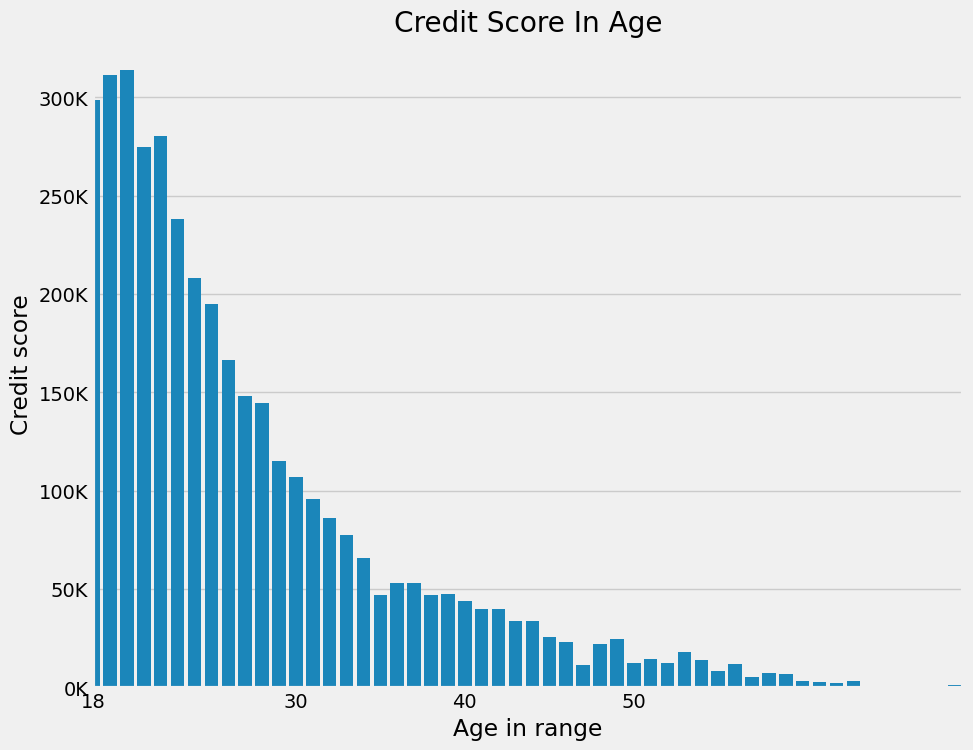

In [240]:
age_credit = age_credit.sort_values(by='Age')
plt.figure(figsize=(10,8))
sns.barplot(
    data = age_credit,
    x = "Age",
    y = "CreditScore",
) 
plt.xlim(left=age_credit['Age'].min()) 

# Define the specific tick locations and labels
tick_locations = [18, 30, 40, 50]  # Adjust based on your data range
tick_labels = ['18', '30', '40', '50']  # Labels for the ticks

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))

# Set x-axis ticks at specific locations and labels
plt.xticks(ticks=tick_locations, labels=tick_labels)
plt.ylabel('Credit score')
plt.xlabel("Age in range")
plt.title("Credit Score In Age")
mean_credit_score = age_credit['CreditScore'].mean()

plt.savefig('Pictures\Credit Score In Age')
plt.show()


In [241]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [253]:
tenure = data.groupby("Tenure").sum()["Exited"].reset_index()
tenure.head()

,Tenure,Exited
0,0,95
1,1,232
2,2,201
3,3,213
4,4,203


<Axes: xlabel='Tenure', ylabel='Exited'>

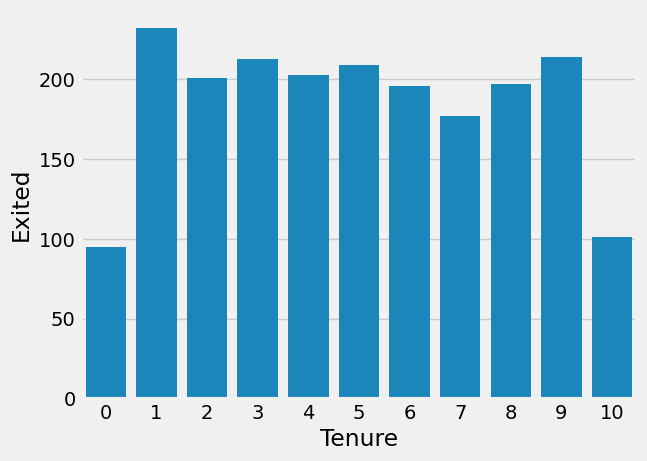

In [254]:
sns.barplot(
    data=tenure,
    x = "Tenure",
    y = "Exited"
)

In [270]:
tenure_gender_exited = data.groupby(["Tenure" , "Gender"]).sum()["Exited"].reset_index()

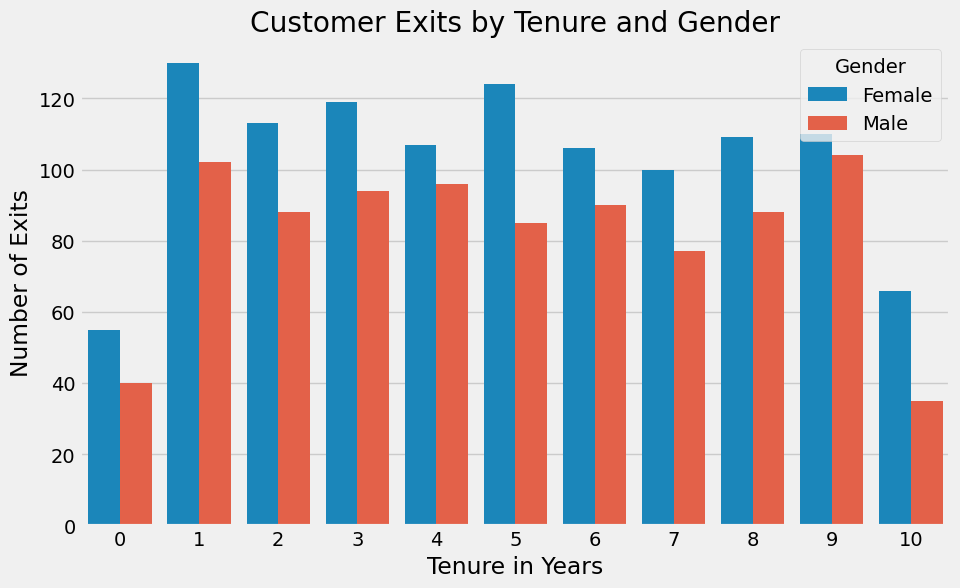

In [276]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Tenure', 
                      y='Exited', hue='Gender', 
                      data=tenure_gender_exited, 
                      ci=None
                      )
plt.title('Customer Exits by Tenure and Gender')
plt.xlabel('Tenure in Years')
plt.ylabel('Number of Exits')
plt.show()

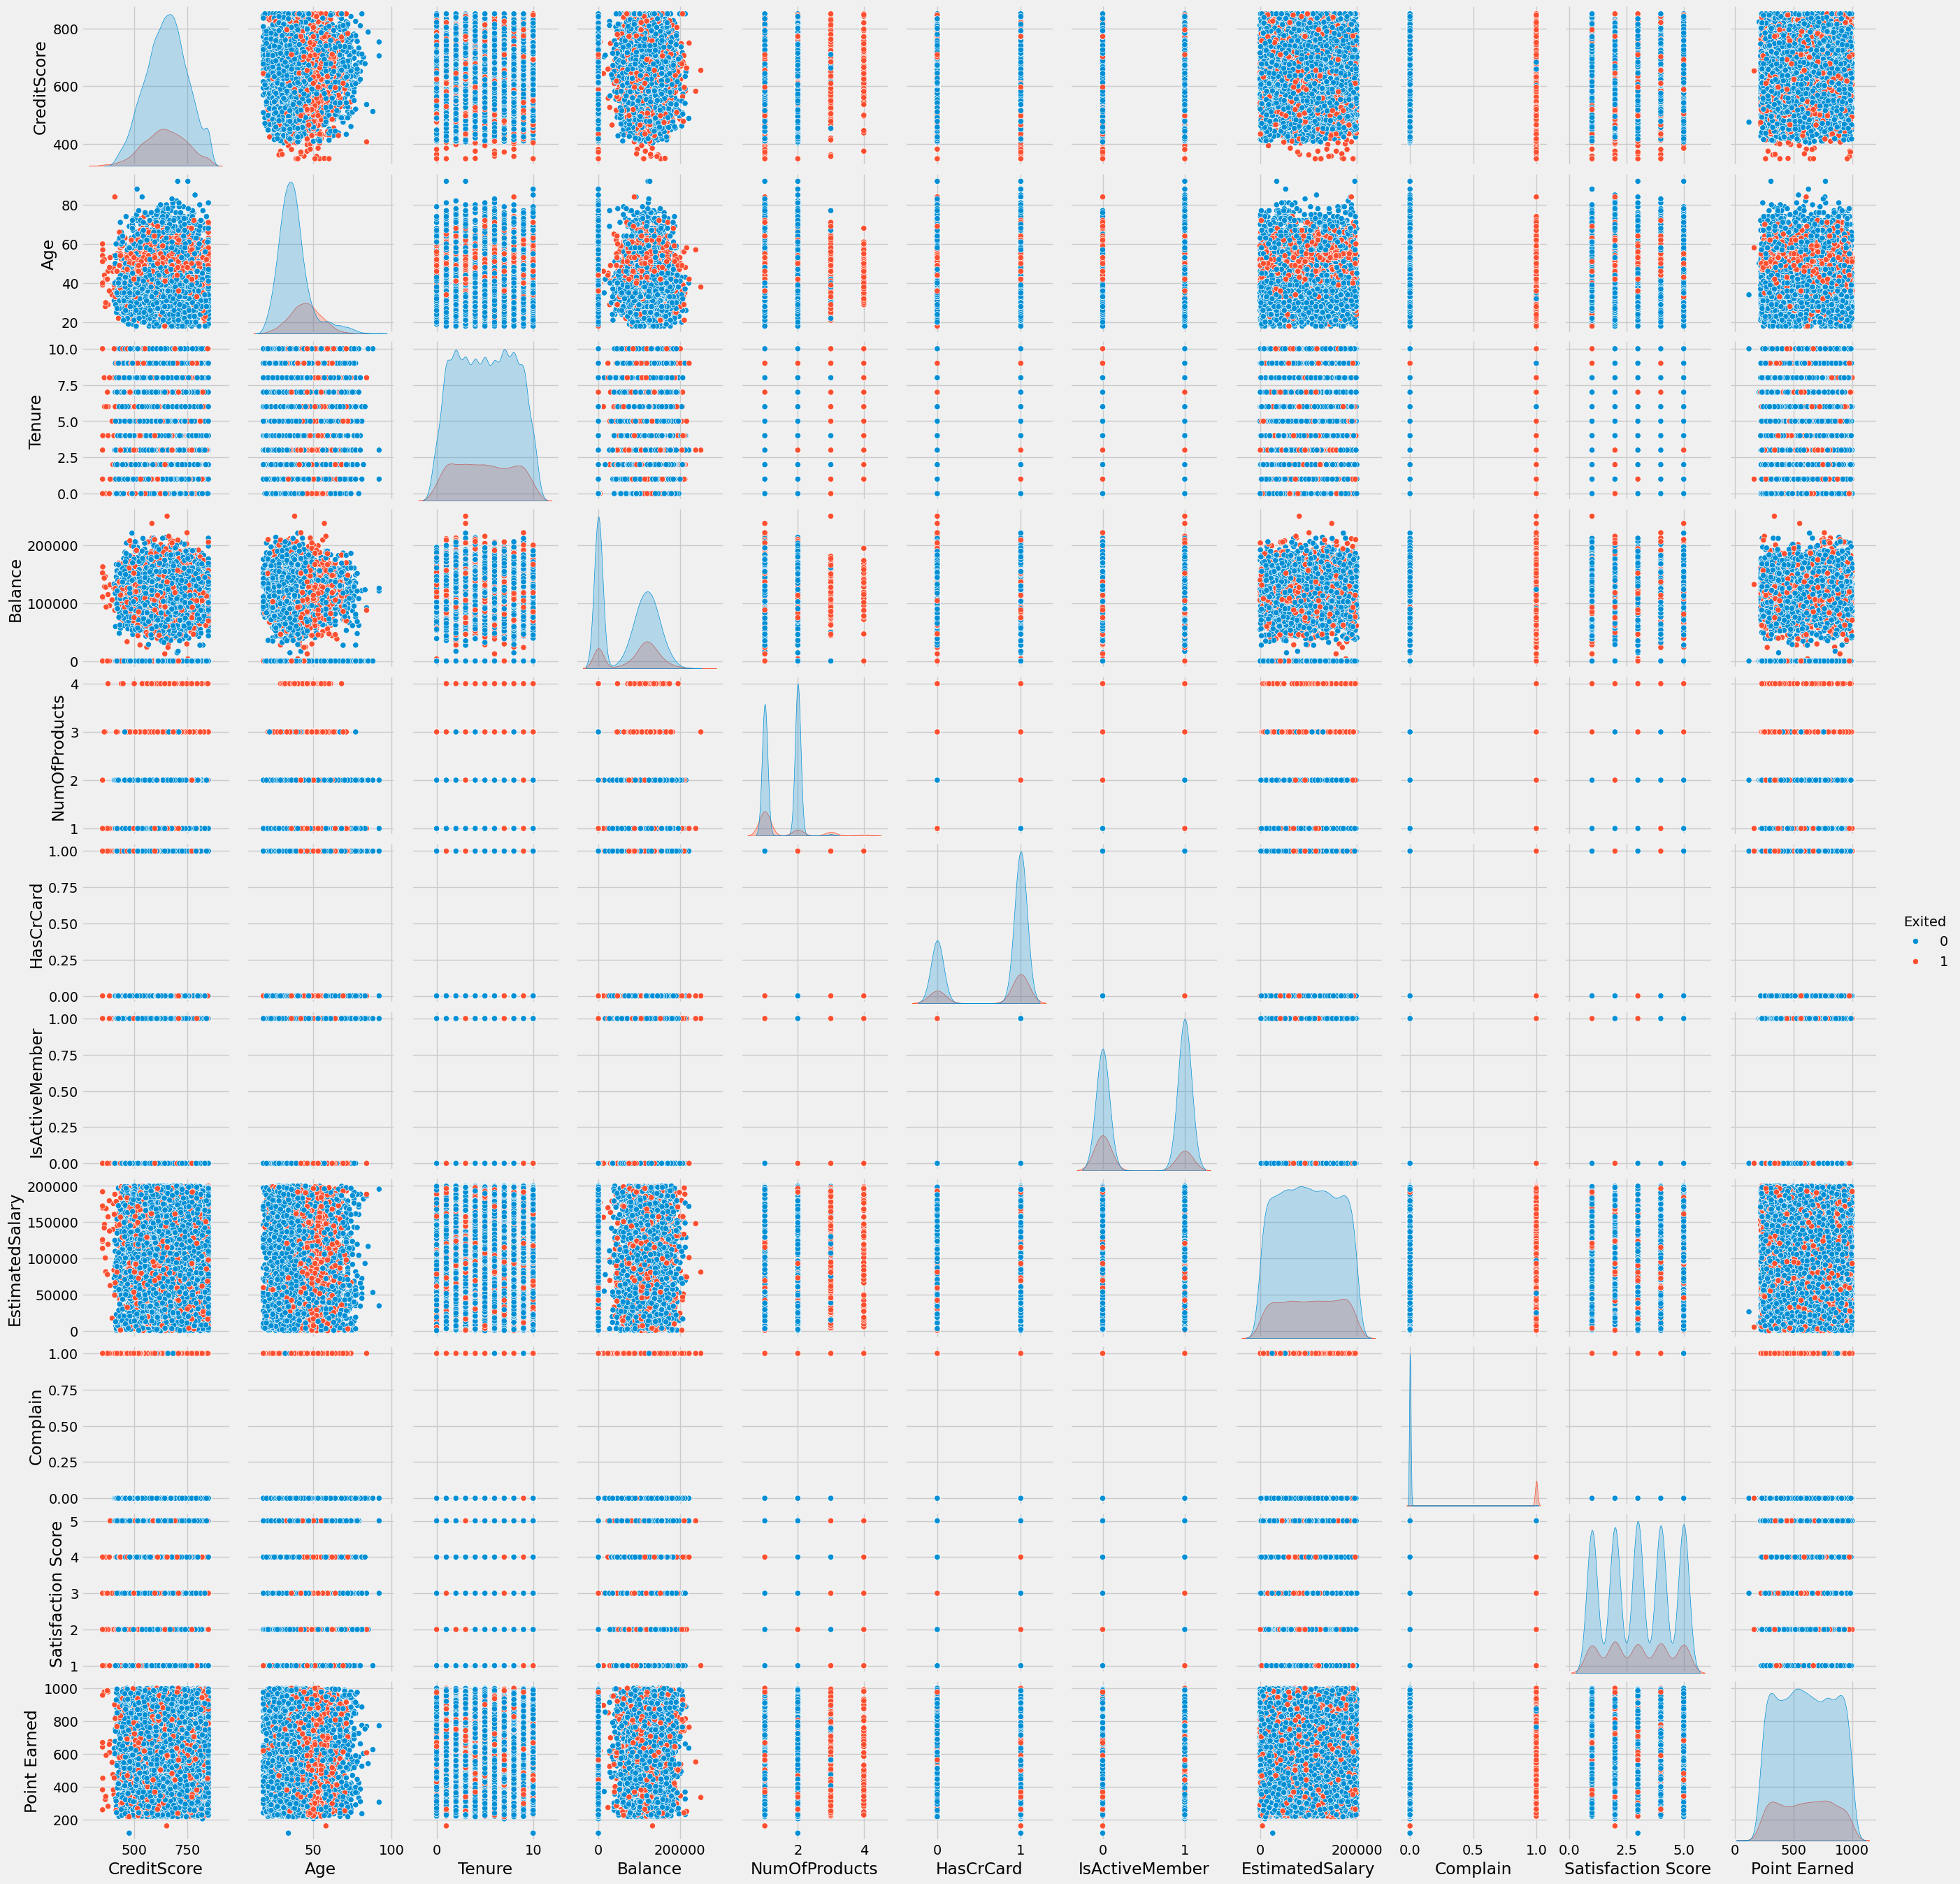

In [269]:
sns.pairplot(data, hue='Exited')
plt.show()